<a href="https://colab.research.google.com/github/Hansastro/Covid-19/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Covid-19 Graphs**

Source:
[ecdc Coronavirus information](https://www.ecdc.europa.eu/en/novel-coronavirus-china)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib
from datetime import date, timedelta

%matplotlib inline

List of the country to display and a start date

In [0]:
countryList = [
               'Germany',
               'France',
               'Italy',
               'Denmark',
               #'United_States_of_America',
               'United_Kingdom',
               'Spain',
               'South_Korea',
               #'China',
               #'Iran',
               #'Chile'
              ]
#countryList = ['China']

startDate = '03/01/2020'

The script will try to download the file of the day. If the file is not available, it will try to download the one of yesterday.

In [13]:
#Download the dataset

url = 'https://www.ecdc.europa.eu/sites/default/files/documents/'
dataset_file_root = r'COVID-19-geographic-disbtribution-worldwide-'

today = date.today()
dataset_file = dataset_file_root + today.strftime('%Y-%m-%d') + '.xlsx'

# Try to find the file for today
try:
  print('Download the data of today ({})...'.format(today.strftime('%Y-%m-%d')))
  df = pd.read_excel(url + dataset_file)
except urllib.error.HTTPError:
  # If exception try the file of yesterday
  print('File for today ({}) not found. Trying to open the file of yesterday'.format(today.strftime('%Y-%m-%d')))
  yesterday = today - timedelta(days=1)
  dataset_file = dataset_file_root + yesterday.strftime('%Y-%m-%d') + '.xlsx'
  try:
    print('Download the data of yesterday ({})...'.format(yesterday.strftime('%Y-%m-%d')))
    df = pd.read_excel(url + dataset_file)
  except urllib.error.HTTPError:
    print('No File not available for {} and {}...'.format(today.strftime('%Y-%m-%d'), yesterday.strftime('%Y-%m-%d')))
    df = None

# convert the date in date format
df['dateRep'] = pd.to_datetime(df['dateRep'])
df.sort_values(by=['countriesAndTerritories', 'dateRep'], inplace=True)

# Calculate the cumulative sum of cases and deaths
df['totalCases'] = df.groupby(by=['countriesAndTerritories'])['cases'].apply(lambda x: x.cumsum())
df['totalDeaths'] = df.groupby(by=['countriesAndTerritories'])['deaths'].apply(lambda x: x.cumsum())

Download the data of today (2020-04-10)...


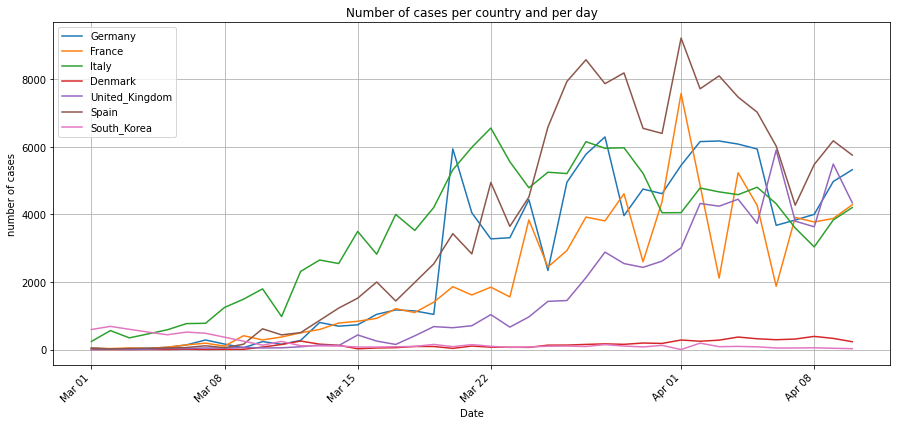

In [14]:
# Make the curve of the amount of infected people per day

# Old version
#if df is not None:
#  fig, ax = plt.subplots(figsize=(15,7))
#
#  for c in countryList:
#      ax.plot(df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['DateRep']], \
#               df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['NewConfCases']])
#  ax.set_title('Number of cases per country and per day')
#  ax.set_xlabel('Date')
#  ax.set_ylabel('number of cases')
#  ax.grid(True)
#  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#  ax.legend(countryList)
#  fig.autofmt_xdate(rotation=45)
#  fig.show()

if df is not None:
  fig, ax = plt.subplots(figsize=(15,7))

  for c in countryList:
      ax.plot(df.loc[(df['countriesAndTerritories'] == c) & (df['dateRep'] >= startDate), ['dateRep']], \
               df.loc[(df['countriesAndTerritories'] == c) & (df['dateRep'] >= startDate), ['cases']])
  ax.set_title('Number of cases per country and per day')
  ax.set_xlabel('Date')
  ax.set_ylabel('number of cases')
  ax.grid(True)
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
  ax.legend(countryList)
  fig.autofmt_xdate(rotation=45)
  fig.show()

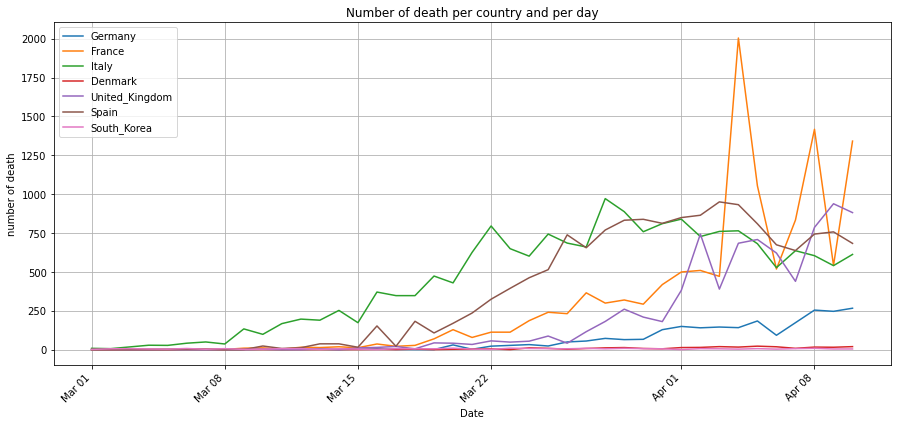

In [15]:
# Make the curve of the death per day

# Old version
#if df is not None:
#  fig, ax = plt.subplots(figsize=(15,7))
#
#  for c in countryList:
#      ax.plot(df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['DateRep']], \
#              df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['NewDeaths']])
#  ax.set_title('Number of cases per country and per day')
#  ax.set_xlabel('Date')
#  ax.set_ylabel('number of cases')
#  ax.grid(True)
#  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#  ax.legend(countryList)
#  fig.autofmt_xdate(rotation=45)
#  fig.show()

if df is not None:
  fig, ax = plt.subplots(figsize=(15,7))

  for c in countryList:
      ax.plot(df.loc[(df['countriesAndTerritories'] == c) & (df['dateRep'] >= startDate), ['dateRep']], \
              df.loc[(df['countriesAndTerritories'] == c) & (df['dateRep'] >= startDate), ['deaths']])
  ax.set_title('Number of death per country and per day')
  ax.set_xlabel('Date')
  ax.set_ylabel('number of death')
  ax.grid(True)
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
  ax.legend(countryList)
  fig.autofmt_xdate(rotation=45)
  fig.show()

<Figure size 432x288 with 0 Axes>

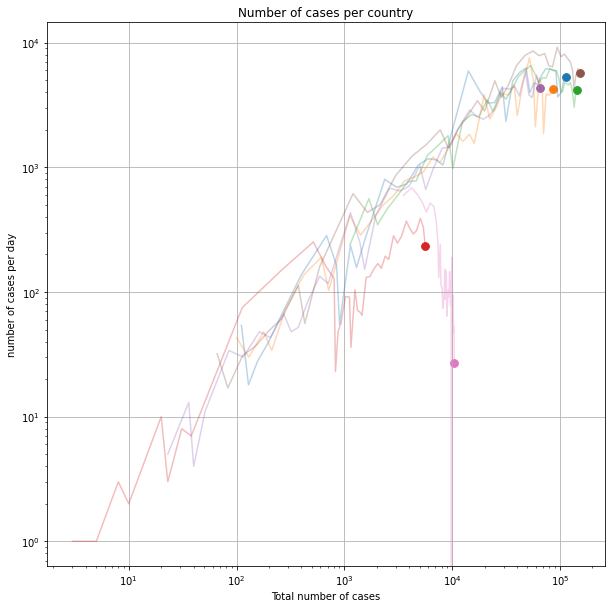

In [16]:
fig = plt.figure()
#ax = fig.add_subplot(2, 1, 1)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Number of cases per country')
ax.set_xlabel('Total number of cases')
ax.set_ylabel('number of cases per day')
ax.grid(True)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax.legend(countryList)

for c in countryList:
  df3 = df.loc[(df['countriesAndTerritories'] == c) & (df['dateRep'] >= startDate)]
  ax.plot(df3['totalCases'], df3['cases'], alpha=0.3)
  #ax.loglog(df3['totalCases'], df3['cases'], alpha=0.3)
  totalCases = df3.iloc[-1]['totalCases']
  cases =  df3.iloc[-1]['cases']
  ax.scatter(totalCases, cases, s=60)
  #ax.annotate(xy=[totalCases, cases], s=c)

ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

<Figure size 432x288 with 0 Axes>

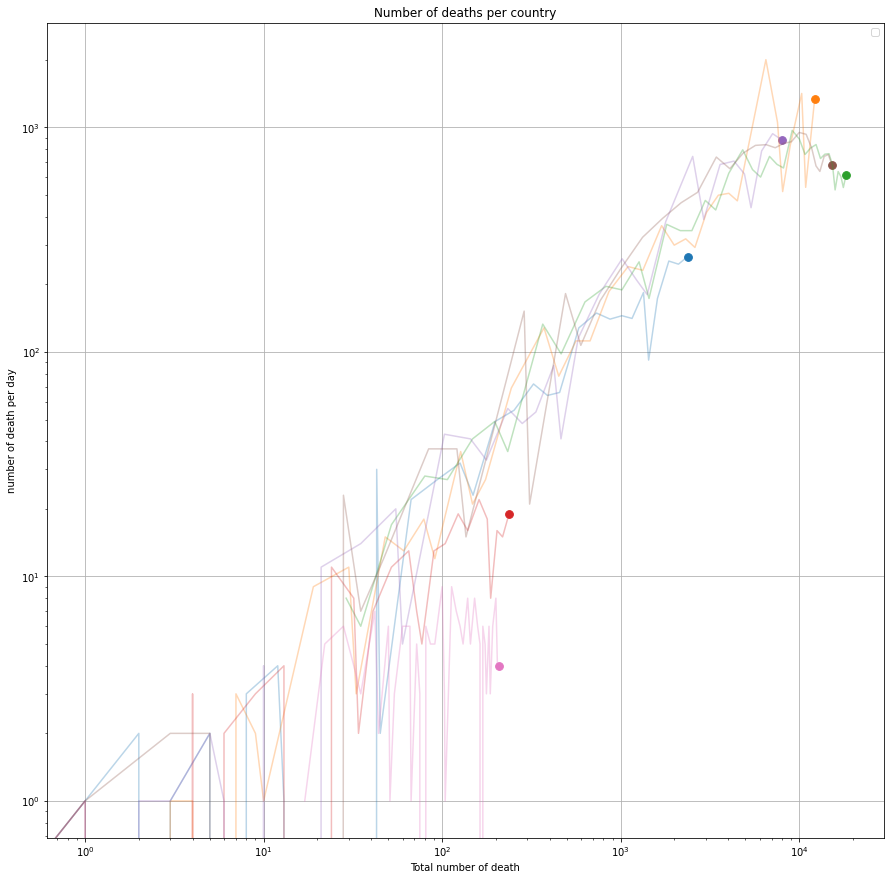

In [17]:
fig = plt.figure()
#ax = fig.add_subplot(2, 1, 1)
fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('Number of deaths per country')
ax.set_xlabel('Total number of death')
ax.set_ylabel('number of death per day')
ax.grid(True)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.legend(countryList)

for c in countryList:
  df3 = df.loc[(df['countriesAndTerritories'] == c) & (df['dateRep'] >= startDate)]
  ax.plot(df3['totalDeaths'], df3['deaths'], alpha=0.3)
  totalCases = df3.iloc[-1]['totalDeaths']
  cases =  df3.iloc[-1]['deaths']
  ax.scatter(totalCases, cases, s=60)
  #ax.annotate(xy=[totalCases, cases], s=c)

ax.set_xscale('log')
ax.set_yscale('log')

plt.show()